# Metode Runge-Kutta

Metode Deret Taylor (MDT) memiliki error lokal yang bergantung dengan tingginya order $O\left(h^{m+1} \right)$, dimana $m$ adalah order MDT. Ini berarti jika kita ingin hasilnya mendekati solusi eksak maka kita harus menggunakan MDT order tinggi. Namun kendala yang dihadapi adalah kita harus mencari turunan order tinggi $y'',y''',\dots$ yang mana sulit untuk didapatkan dan memakan waktu komputasi yang tidak sedikit. 

__Contoh 2__. Terapkan Metode RK 2 dan 4 untuk 

$$
\begin{matrix}
    y' = -y + e^{-t}, & y(0)=0.
\end{matrix}
$$

(Solusi eksaknya adalah $y(t)=te^{-t}$.)


In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(t, y):
    #k = 6.22e-19
    #n1 = 2e3
    #n2 = 2e3
    #n3 = 3e3
    #return (k*((n1 - y/2)**2)*((n2 - y/2)**2)*((n3 - 3*y/4)**3))
    #return -y + math.exp(-t)
    return y - t**2 + 1
h = 0.2
T = 2

In [3]:
# Metode Heun / RK-2

N = int(T/h)
t = np.zeros(N+2)
y_h = np.zeros(N+2) + 0.5
y_a = np.zeros(N+2) + 0.5

for k in range(N+1):
    t[k+1] = t[0] + (k+1)*h
    #y_a[k+1] = t[k+1]*math.exp(-t[k+1])
    y_a[k+1] = (t[k+1] + 1)**2 - 0.5*math.exp(t[k+1])
    
    K1 = h*f(t[k], y_h[k])
    K2 = h*f(t[k+1], y_h[k]+K1)
    
    y_h[k+1] = y_h[k] + 0.5*(K1+K2)

In [4]:
# Metode RK4
N = int(T/h)
t = np.zeros(N+2)
y_rk4 = np.zeros(N+2) + 0.5


for k in range(N+1):
    t[k+1] = t[0] + (k+1)*h    
    
    K1 = h*f(t[k], y_rk4[k])
    K2 = h*f(t[k]+0.5*h, y_rk4[k]+0.5*K1)
    K3 = h*f(t[k]+0.5*h, y_rk4[k]+0.5*K2)
    K4 = h*f(t[k]+h, y_rk4[k]+K3)
    
    y_rk4[k+1] = y_rk4[k] + 1/6*(K1+2*K2+2*K3+K4)
    

In [5]:
for i in range(N+1):
    print(t[i], y_a[i], y_h[i], y_rk4[i], abs(y_a[i]-y_h[i]), abs(y_a[i]-y_rk4[i]))

0.0 0.5 0.5 0.5 0.0 0.0
0.2 0.829298620919915 0.8260000000000001 0.8292933333333333 0.003298620919914952 5.287586581692594e-06
0.4 1.2140876511793646 1.2069200000000002 1.2140762106666667 0.007167651179364354 1.1440512697857841e-05
0.6000000000000001 1.648940599804746 1.6372424000000003 1.6489220170416 0.011698199804745624 1.8582763146035575e-05
0.8 2.1272295357537665 2.1102357280000006 2.1272026849479433 0.01699380775376591 2.6850805823208646e-05
1.0 2.6408590857704777 2.617687588160001 2.6408226927287513 0.023171497610476877 3.639304172642355e-05
1.2000000000000002 3.1799415386317267 3.149578857555201 3.17989417023223 0.03036268107652562 4.736839949659455e-05
1.4000000000000001 3.732400016577664 3.693686206217345 3.732340072854979 0.038713810360318845 5.994372268469661e-05
1.6 4.283483787802443 4.235097171585161 4.283409498318405 0.04838661621728235 7.428948403820357e-05
1.8 4.815176267793525 4.755618549333896 4.815085694579433 0.05955771845962943 9.057321409233765e-05
2.0 5.30547195

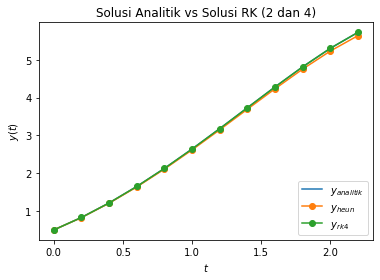

In [6]:
plt.title('Solusi Analitik vs Solusi RK (2 dan 4)')
plt.xlabel('$t$')
plt.ylabel('$y(t)$')

plt.plot(t,y_a, label="$y_{analitik}$")
plt.plot(t,y_h, '-o', label="$y_{heun}$")
plt.plot(t,y_rk4, '-o', label="$y_{rk4}$")
plt.legend(loc=4)

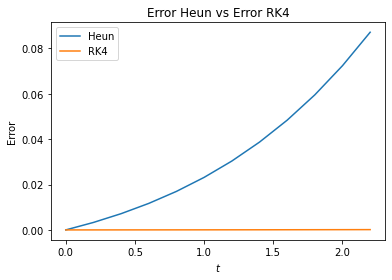

In [7]:
error_h = abs(y_a-y_h)
error_rk4 = abs(y_a-y_rk4)

plt.title('Error Heun vs Error RK4')
plt.xlabel('$t$')
plt.ylabel('Error')

plt.plot(t,error_h, label="Heun")
plt.plot(t,error_rk4, label="RK4")

plt.legend()